# Коррекция изображений
Используем гистограммы и фильтры резкости и контраста для улучшения качества изображений для дальнейшего анализа нейросетью

Данные: https://video.ittensive.com/machine-vision/symbols.zip

### Подключение библиотек

In [1]:
%matplotlib inline
import numpy as np
from PIL import Image,ImageFilter,ImageEnhance
import matplotlib.pyplot as plt

### Чтение файла
Используем symbols\20\99.bmp

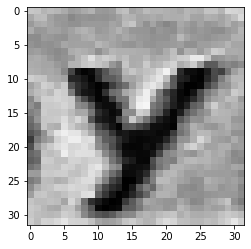

In [4]:
size = (32,32)
image = Image.open("symbols\\20\99.bmp").resize(size, Image.BICUBIC)
plt.imshow(image)
plt.show()

### Гистограмма яркости
Для серого изображения будет 1 канал, для цветного - 3

Выгрузим значения пикселей в отдельный массив.

In [5]:
def show_hist(image):
    pix = np.array(image)
    plt.figure(figsize=(16,8))
    plt.hist(pix.flatten(), 256, [0,256])
    plt.show()

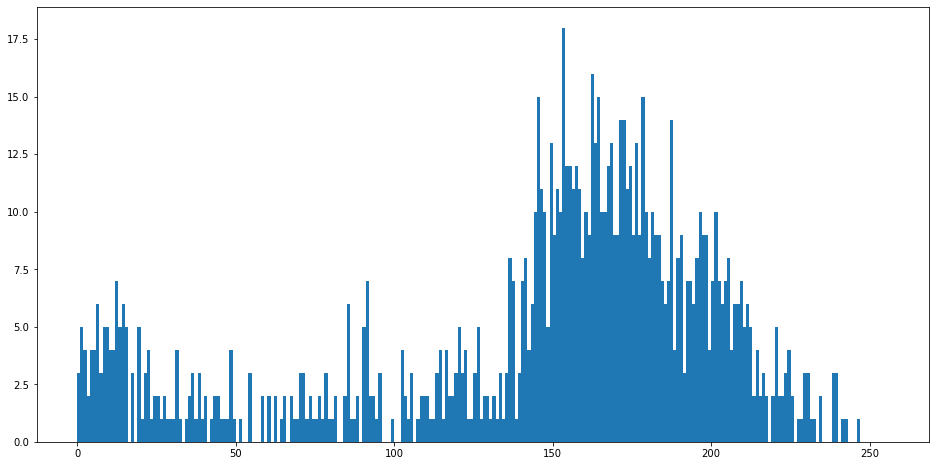

In [6]:
show_hist(image)

Удаление шума через маску преобразования цветов

In [7]:
threshold = 100
mask = np.append(np.zeros(threshold, dtype=np.uint8), np.ones(256-threshold, dtype=np.uint8))
print (mask)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


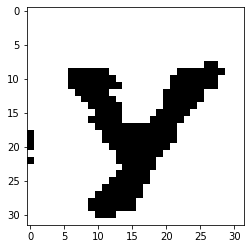

In [8]:
image_filtered = Image.fromarray(mask[np.array(image)])
plt.imshow(image_filtered, cmap="gray")
plt.show()

### Фильтр резкости
Используем встроенный фильтр для удаления шума

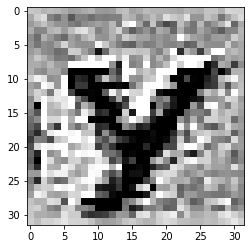

In [9]:
image_sharp = image.convert("RGB").filter(ImageFilter.SHARPEN).filter(ImageFilter.SHARPEN).convert("L")
plt.imshow(image_sharp, cmap="gray")
plt.show()

Гистограмма измененного изображения

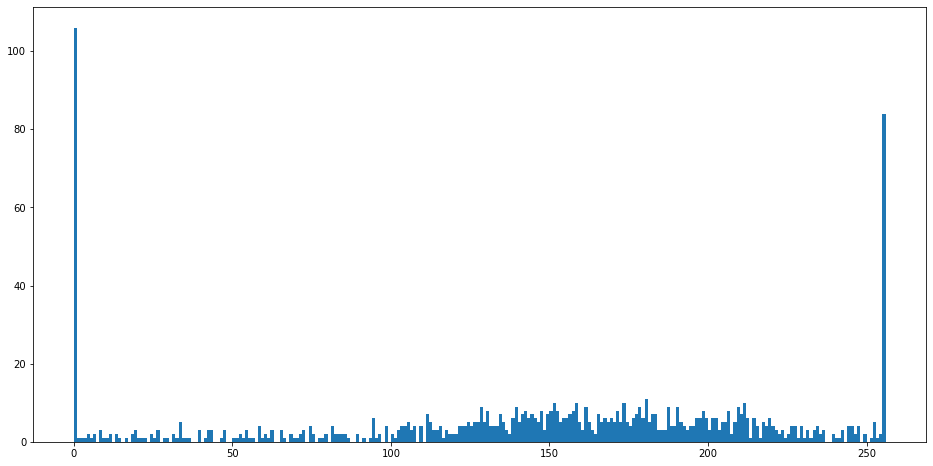

In [10]:
show_hist(image_sharp)

### Повышение контраста

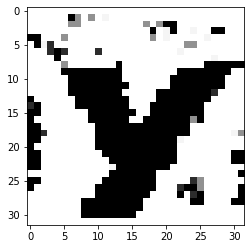

In [11]:
image_contrast = ImageEnhance.Contrast(image.convert("RGB")).enhance(100).convert("L")
plt.imshow(image_contrast, cmap="gray")
plt.show()

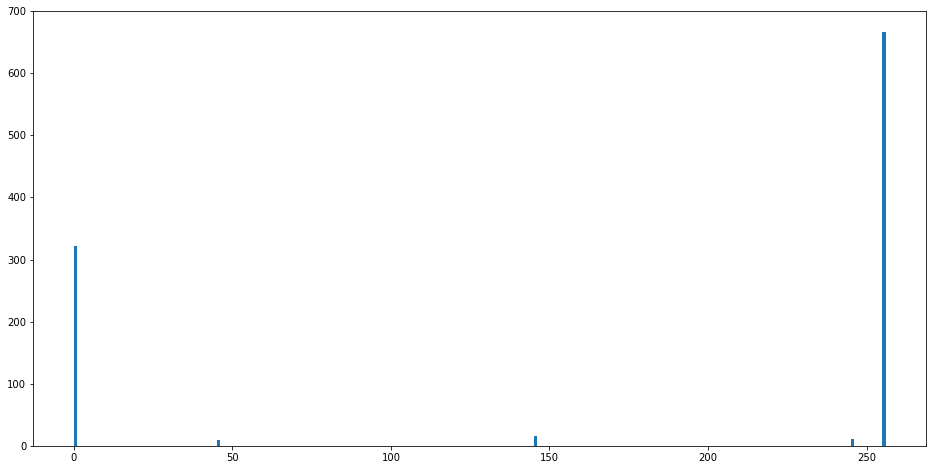

In [12]:
show_hist(image_contrast)